In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

In [2]:
df = pd.read_excel("house.xlsx")       ## Reading the dataset(excel)
df

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.shape

(414, 9)

In [5]:
price = df['House size (sqft)'] * df['House price of unit area']       ##Total price of house

In [6]:
type(price)

pandas.core.series.Series

In [7]:
price = price.to_frame()                  ##Series to DataFrame

In [8]:
type(price)

pandas.core.frame.DataFrame

In [9]:
price

,0
0,21792.5
1,52328.0
2,50138.0
3,47950.0
4,21162.1
...,...
409,12366.2
410,63900.0
411,20421.8
412,31342.5


In [10]:
price.columns = ['Price']                   ## Adding column name 

In [11]:
price

,Price
0,21792.5
1,52328.0
2,50138.0
3,47950.0
4,21162.1
...,...
409,12366.2
410,63900.0
411,20421.8
412,31342.5


In [12]:
df = df.join(price)                    ##Joining total price column to orignal dataset

In [13]:
df

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,Price
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,21792.5
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,52328.0
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,50138.0
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,47950.0
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,21162.1
...,...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4,12366.2
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0,63900.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6,20421.8
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5,31342.5


In [14]:
df.describe()              ##Summary of data(mean,median, max,min,etc.)

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,Price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193,35597.804106
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488,19890.892075
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000,5440.400000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000,20482.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000,31224.200000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000,48439.375000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000,161327.500000


In [15]:
df.columns                          ## All features and Price

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area',
       'Price'],
      dtype='object')

In [16]:
df['Number of bedrooms'].value_counts()

1    141
2    137
3    136
Name: Number of bedrooms, dtype: int64

In [17]:
df['Number of convenience stores'].value_counts()

5     67
0     67
3     46
1     46
6     37
7     31
4     31
8     30
9     25
2     24
10    10
Name: Number of convenience stores, dtype: int64

Price vs Distance from nearest Metro station (km)

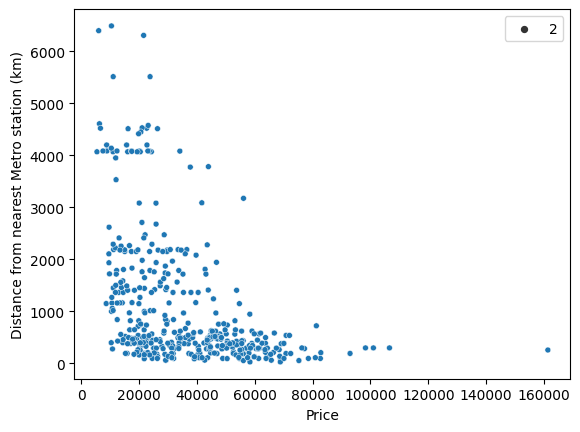

In [18]:
sns.scatterplot(df,x='Price',y='Distance from nearest Metro station (km)',size=2);

In [19]:
df.corr().Price.sort_values()

Distance from nearest Metro station (km)   -0.441094
House Age                                  -0.198741
Transaction date                            0.119059
longitude                                   0.346538
latitude                                    0.378440
Number of convenience stores                0.381169
Number of bedrooms                          0.548679
House price of unit area                    0.698585
House size (sqft)                           0.702782
Price                                       1.000000
Name: Price, dtype: float64

Here correlation of Price and Distance from nearest Metro station (km) is negative; therefore for less Distance from nearest Metro station (km), price will be high

Price vs House Age

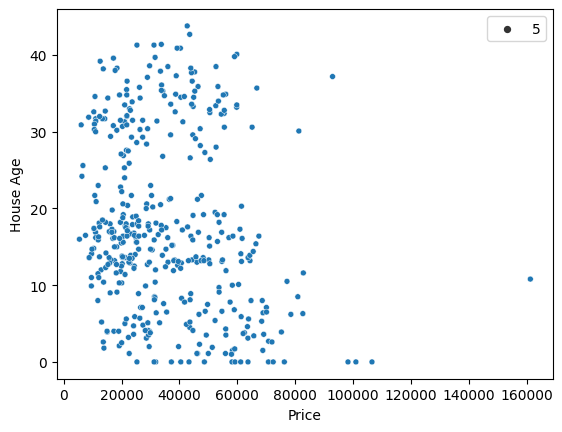

In [20]:
sns.scatterplot(df,x='Price',y='House Age',size=5);

In [21]:
df.corr().Price.sort_values()

Distance from nearest Metro station (km)   -0.441094
House Age                                  -0.198741
Transaction date                            0.119059
longitude                                   0.346538
latitude                                    0.378440
Number of convenience stores                0.381169
Number of bedrooms                          0.548679
House price of unit area                    0.698585
House size (sqft)                           0.702782
Price                                       1.000000
Name: Price, dtype: float64

Here high price will be for less house age since correlation between Price and house age is negative

Price variation

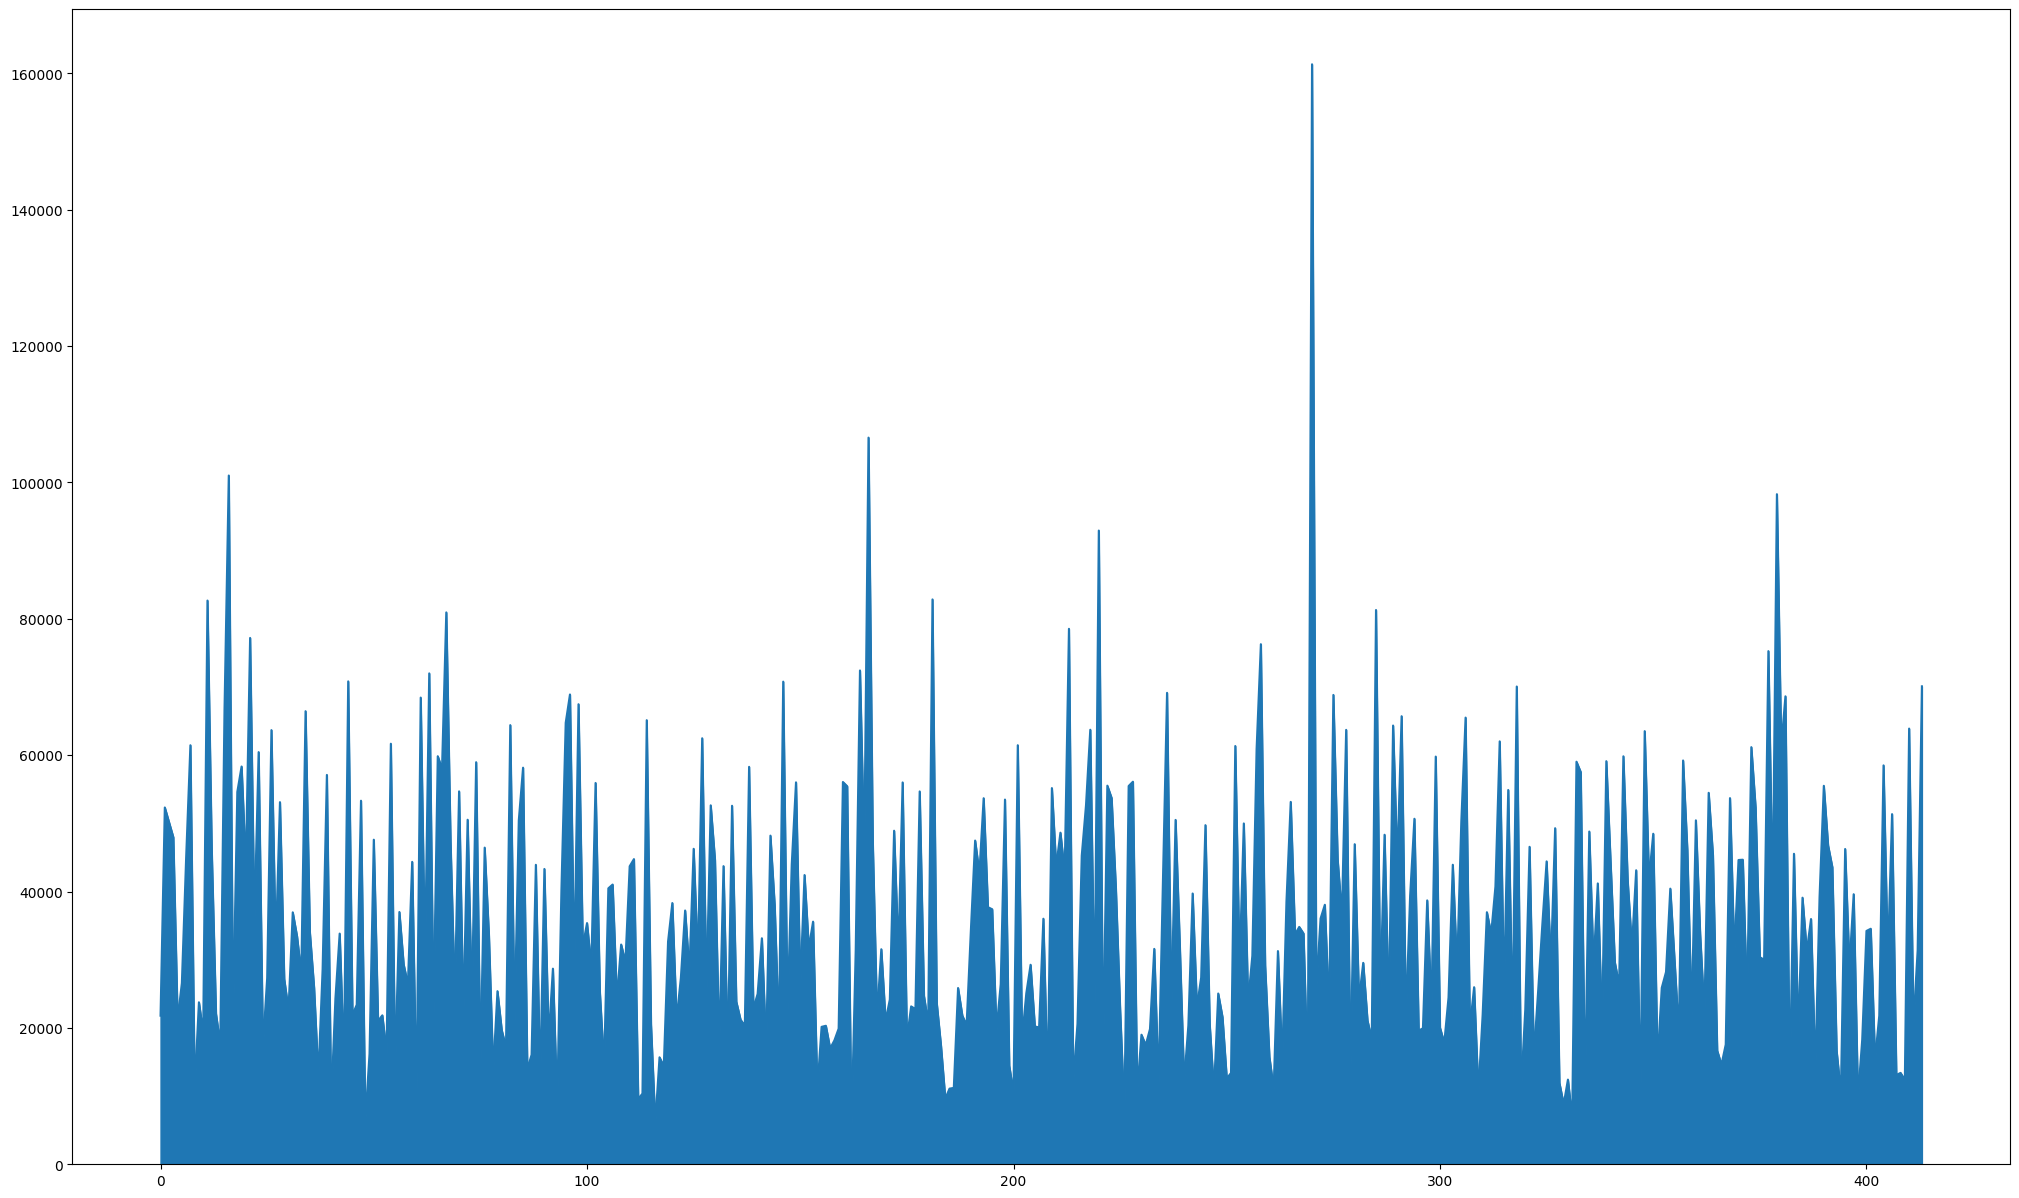

In [22]:
df.Price.plot.area(figsize=(25,15),);

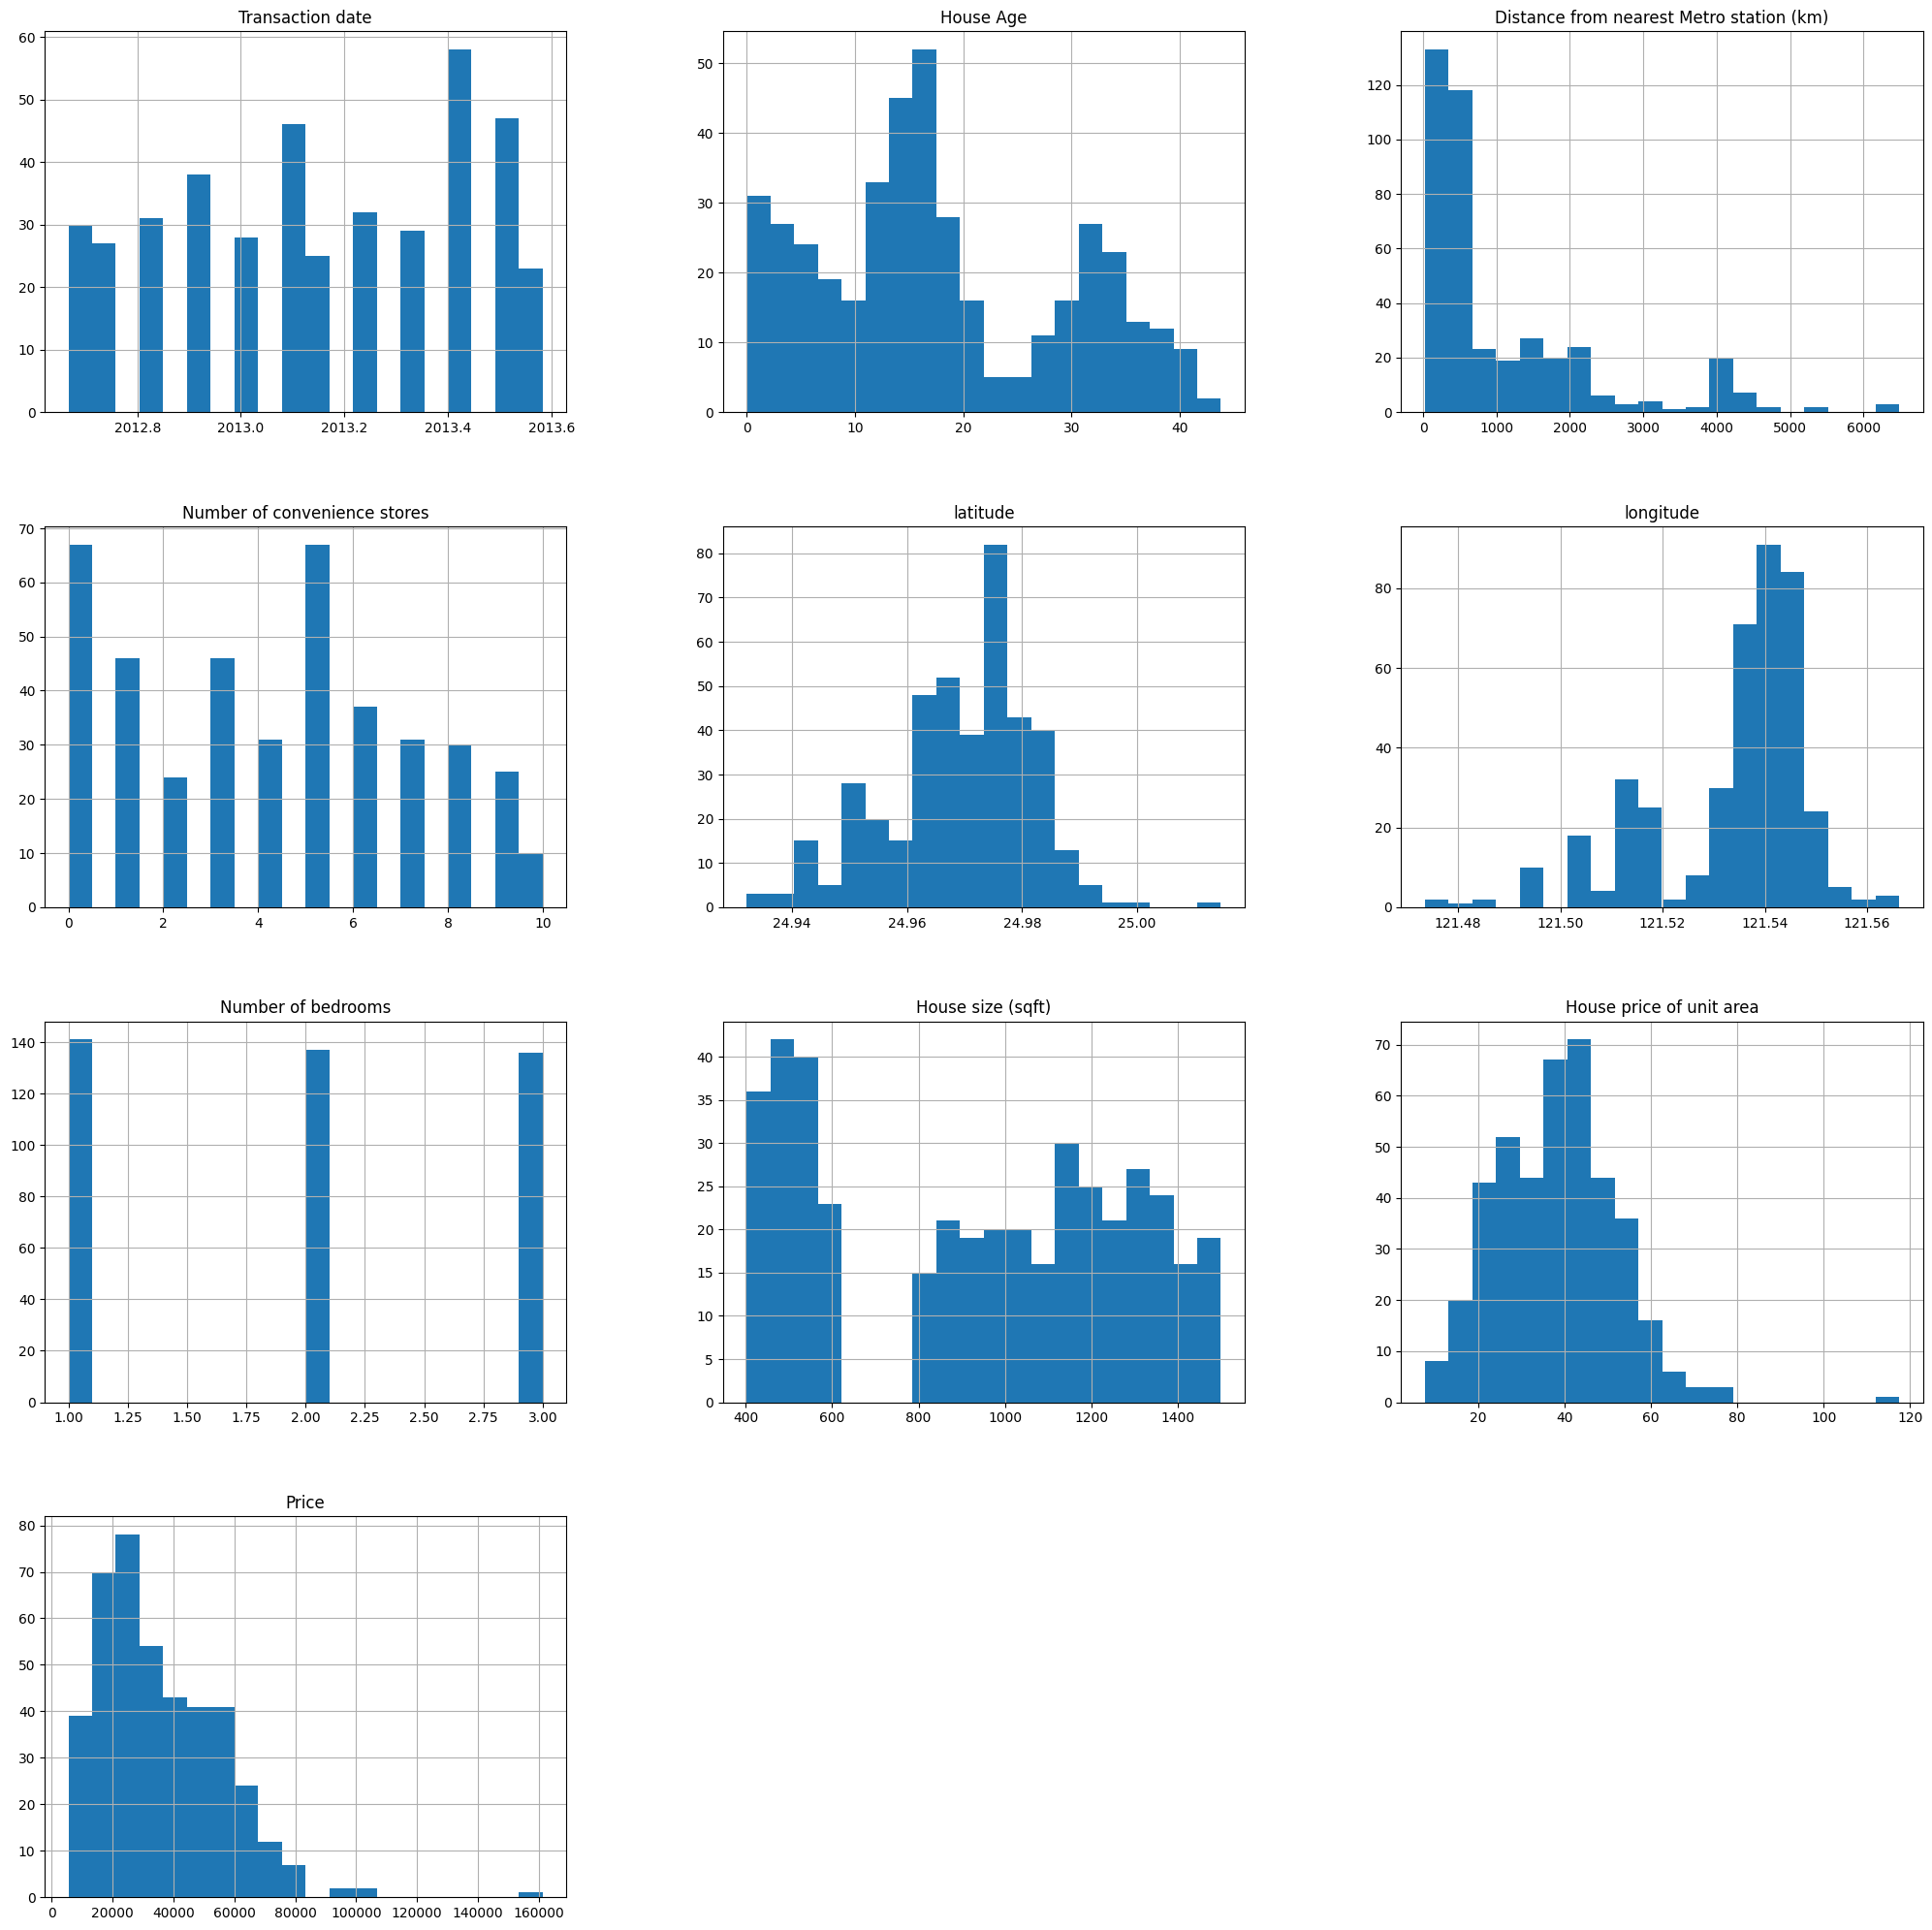

In [23]:
df.hist(figsize=(25,25), bins=20);

In [24]:
df.isnull()                   ##Null values

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,Price
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
409,False,False,False,False,False,False,False,False,False,False
410,False,False,False,False,False,False,False,False,False,False
411,False,False,False,False,False,False,False,False,False,False
412,False,False,False,False,False,False,False,False,False,False


In [25]:
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
Price                                       0
dtype: int64

<AxesSubplot:>

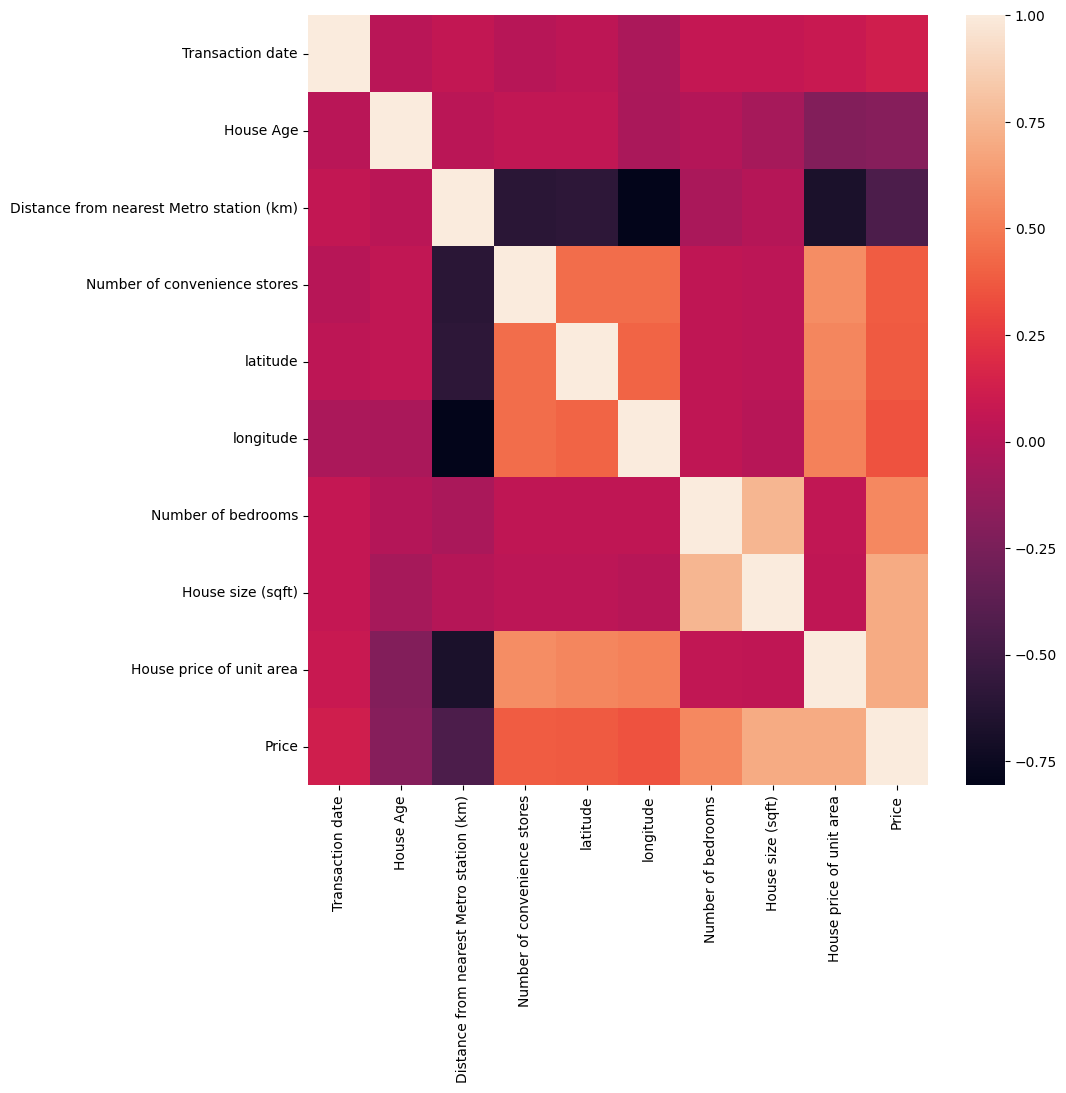

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

In [27]:
df.corr().Price.sort_values()              ## Correlation between features

Distance from nearest Metro station (km)   -0.441094
House Age                                  -0.198741
Transaction date                            0.119059
longitude                                   0.346538
latitude                                    0.378440
Number of convenience stores                0.381169
Number of bedrooms                          0.548679
House price of unit area                    0.698585
House size (sqft)                           0.702782
Price                                       1.000000
Name: Price, dtype: float64

Excluding Price(since it is output), House price of unit area(since it will not be given in dataset for prediction) and Transaction date(no use of it) from the features list

In [28]:
x = df.drop(['Price','House price of unit area','Transaction date'],axis=1)
y = df[['Price']]

In [29]:
x.shape

(414, 7)

In [30]:
y.shape

(414, 1)

Splitting data into test and train dataset

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [33]:
lr.score(x_test,y_test)

0.7631722110242833

Ridge Regression

In [34]:
from sklearn.linear_model import Ridge

rid = Ridge()
rid.fit(x_train, y_train)

Ridge()

In [35]:
rid.score(x_test,y_test)

0.7515084146548782

Lasso Regression

In [36]:
from sklearn.linear_model import Lasso

las = Lasso()
las.fit(x_train, y_train)

Lasso()

In [37]:
las.score(x_test,y_test)

0.7653192587744774

Decision Tree Regressor

In [38]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [39]:
dtr.score(x_test,y_test)

0.5122990112074051

Random Forest Regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

C:\Users\User\AppData\Local\Temp\ipykernel_19420\1380043830.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train, y_train)


RandomForestRegressor()

In [41]:
rfr.score(x_test,y_test)

0.8413860720940162

Table

In [42]:
score = pd.DataFrame({
            'Model':['Linear Regression','Ridge Regression','Lasso Regression','Decision Tree Regressor','Random Forest Regressor'],
            'Score(in %)':[100*lr.score(x_test,y_test),100*rid.score(x_test,y_test),100*las.score(x_test,y_test),100*dtr.score(x_test,y_test),100*rfr.score(x_test,y_test)]
                    })
score#.sort_values(by='Score',ascending=False)

,Model,Score(in %)
0,Linear Regression,76.317221
1,Ridge Regression,75.150841
2,Lasso Regression,76.531926
3,Decision Tree Regressor,51.229901
4,Random Forest Regressor,84.138607


Random Forest Regressor has the HIGHEST accuracy

DISADVANTAGES:-

0. Linear Regression - Underfitting due to linear relation, overfitting due to large number of features and sensitive to outliers
1. Ridge Regression - Can't perform feature selection
2. Lasso Regression - Highly biased(weighted) features
3. Decision Tree Regressor - Prone to overfitting and sensitive to outliers
4. Random Forest Regressor - Time(training) complexity is high since it combines the output of multiple decision trees